In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
batch_size=32
img_height=256
img_width=256


train_ds = tf.keras.utils.image_dataset_from_directory(
  "asl_alphabet_train/asl_alphabet_train/",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 86996 files belonging to 29 classes.
Using 69597 files for training.
Metal device set to: Apple M1 Pro


2022-08-14 12:39:42.739449: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-14 12:39:42.739589: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "asl_alphabet_train/asl_alphabet_train/",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 86996 files belonging to 29 classes.
Using 17399 files for validation.


In [4]:
class_names = train_ds.class_names
print("Class names:",class_names)
print("Total classes:",len(class_names))

Class names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
Total classes: 29


2022-08-14 12:40:18.327506: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


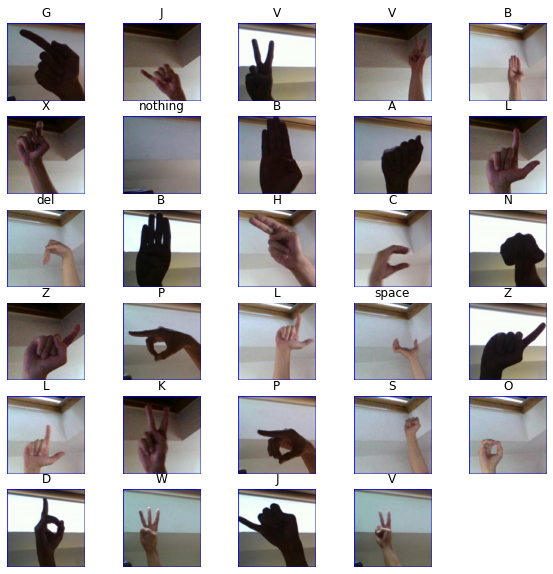

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(29):
        ax = plt.subplot(6,5 , i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
from tensorflow.keras.layers import Rescaling

In [7]:
import tensorflow

In [8]:
#modelling

from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(29,activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
model.fit(train_ds, batch_size=32,validation_batch_size=32, validation_data=test_ds,epochs=100)



Epoch 1/100
2175/2175 [==============================] - 203s 93ms/step - loss: 0.0269 - accuracy: 0.9918 - val_loss: 0.0382 - val_accuracy: 0.9886
Epoch 2/100
2175/2175 [==============================] - 202s 93ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.0305 - val_accuracy: 0.9911
Epoch 3/100
2175/2175 [==============================] - 203s 93ms/step - loss: 0.0212 - accuracy: 0.9937 - val_loss: 0.0293 - val_accuracy: 0.9917
Epoch 4/100
2175/2175 [==============================] - 202s 93ms/step - loss: 0.0208 - accuracy: 0.9943 - val_loss: 0.0309 - val_accuracy: 0.9917
Epoch 5/100
2175/2175 [==============================] - 202s 93ms/step - loss: 0.0164 - accuracy: 0.9952 - val_loss: 0.0457 - val_accuracy: 0.9884
Epoch 6/100
2175/2175 [==============================] - 202s 93ms/step - loss: 0.0183 - accuracy: 0.9946 - val_loss: 0.0399 - val_accuracy: 0.9909
Epoch 7/100
2175/2175 [==============================] - 202s 93ms/step - loss: 0.0131 - accuracy: 0.9964 - val_

2175/2175 [==============================] - 203s 93ms/step - loss: 0.0062 - accuracy: 0.9989 - val_loss: 0.0435 - val_accuracy: 0.9938
Epoch 57/100
2175/2175 [==============================] - 203s 93ms/step - loss: 0.0074 - accuracy: 0.9987 - val_loss: 0.0501 - val_accuracy: 0.9942
Epoch 58/100
2175/2175 [==============================] - 204s 94ms/step - loss: 0.0062 - accuracy: 0.9990 - val_loss: 0.0987 - val_accuracy: 0.9901
Epoch 59/100
2175/2175 [==============================] - 205s 94ms/step - loss: 0.0119 - accuracy: 0.9983 - val_loss: 0.0467 - val_accuracy: 0.9947
Epoch 60/100
2175/2175 [==============================] - 204s 94ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0792 - val_accuracy: 0.9918
Epoch 61/100
2175/2175 [==============================] - 205s 94ms/step - loss: 0.0094 - accuracy: 0.9986 - val_loss: 0.0471 - val_accuracy: 0.9946
Epoch 62/100
2175/2175 [==============================] - 203s 94ms/step - loss: 0.0057 - accuracy: 0.9990 - val_loss: 

In [14]:
model.save("ASL_Project") 

INFO:tensorflow:Assets written to: ASL_Project/assets


INFO:tensorflow:Assets written to: ASL_Project/assets


In [17]:
new_model = tensorflow.keras.models.load_model('ASL_Project')